In [1]:
import fastbook

In [2]:
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
files = get_image_files('postures')

In [73]:
posture_db = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)) # Setup DataBlock

In [74]:
dataloader = posture_db.dataloaders('postures') # Setup DataLoader

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


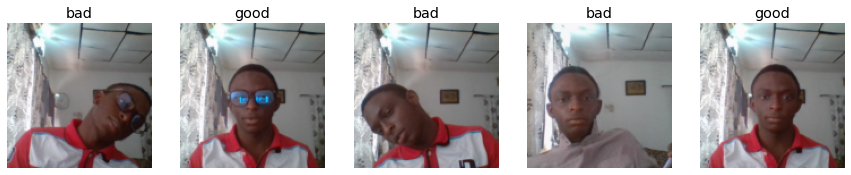

In [75]:
dataloader.valid.show_batch(max_n = 5, nrows = 1) # Show few examples of the training data

In [76]:
posture_model = vision_learner(dataloader, resnet50, metrics = error_rate)
posture_model.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.033828,0.367111,0.108108,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.423019,0.236190,0.108108,00:23
1,0.383761,0.213109,0.108108,00:23
2,0.320353,1.278610,0.459459,00:23
3,0.266745,3.182787,0.648649,00:23
4,0.229064,2.928105,0.648649,00:23
5,0.195788,2.081668,0.405405,00:23
6,0.170381,1.577929,0.270270,00:23
7,0.152662,1.217322,0.081081,00:24
8,0.133669,1.039533,0.081081,00:23
9,0.117961,0.862713,0.054054,00:23


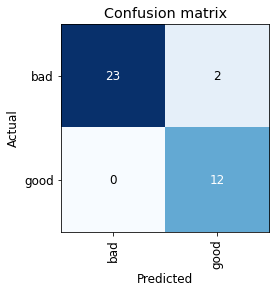

In [77]:
interp = ClassificationInterpretation.from_learner(posture_model)
interp.plot_confusion_matrix()

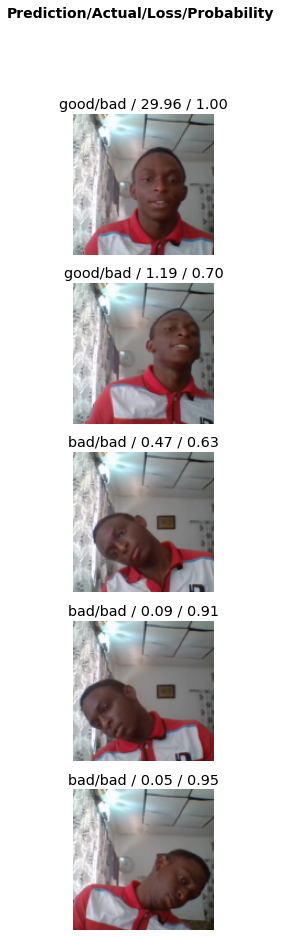

In [78]:
interp.plot_top_losses(5, nrows = 5) # Top 5 examples where the model fails to predict or is doubtful about prediction

In [79]:
posture_model.predict(r"C:\Users\Abdul Karim\Pictures\Camera Roll\WIN_20220613_15_23_48_Pro.jpg") # Test model

('good', TensorBase(1), TensorBase([1.0021e-17, 1.0000e+00]))

In [80]:
posture_model.export('posture_detector_model.pkl') # Serialization